In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_path = 'images/train/'
val_path = 'images/validation/'

In [3]:
classes = ["0","1","2","3","4","5","6"]
img_size = 48

In [4]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [47]:
nb_classes = 7
model = Sequential()

# CONV => RELU => POOL
model.add(Conv2D(64, (3, 3), padding="same",input_shape=(img_size,img_size,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# softmax classifier
model.add(Dense(nb_classes))
model.add(Activation("softmax"))
        
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_35 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_36 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 16, 16, 64)        256       
__________

In [48]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
import pickle
import numpy as np

pickle_in = open("data_x.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("data_y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X=np.array(X)
y=np.array(y)

In [50]:
history=model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2)

Train on 23056 samples, validate on 5765 samples
Epoch 1/40
23056/23056 [==============================] - 150s 6ms/step - loss: 2.0299 - acc: 0.3181 - val_loss: 1.6784 - val_acc: 0.3995
Epoch 2/40
23056/23056 [==============================] - 162s 7ms/step - loss: 1.5298 - acc: 0.4486 - val_loss: 1.5429 - val_acc: 0.4418
Epoch 3/40
23056/23056 [==============================] - 177s 8ms/step - loss: 1.3287 - acc: 0.5183 - val_loss: 1.5508 - val_acc: 0.4463
Epoch 4/40
23056/23056 [==============================] - 192s 8ms/step - loss: 1.1496 - acc: 0.5822 - val_loss: 1.6179 - val_acc: 0.4598
Epoch 5/40
23056/23056 [==============================] - 191s 8ms/step - loss: 1.0050 - acc: 0.6319 - val_loss: 1.5165 - val_acc: 0.4756
Epoch 6/40
23056/23056 [==============================] - 164s 7ms/step - loss: 0.8497 - acc: 0.6921 - val_loss: 1.5955 - val_acc: 0.4645
Epoch 7/40
23056/23056 [==============================] - 151s 7ms/step - loss: 0.7077 - acc: 0.7457 - val_loss: 1.5907 - v

In [51]:
model.save('face_expression.h5')
model.save('face_expression.model')

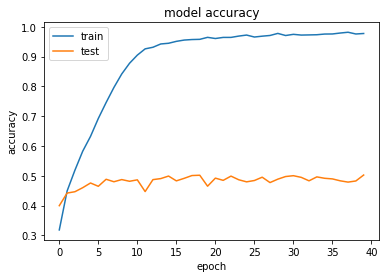

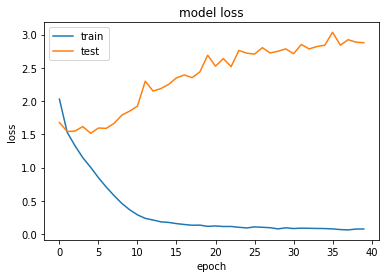

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
history.history

{'val_loss': [1.6783532227832962,
  1.5429415930072226,
  1.5507688322588349,
  1.617901214468717,
  1.5164625550184887,
  1.5955494008473696,
  1.590697913343557,
  1.6655694319285834,
  1.7893547281842592,
  1.8503961735565768,
  1.92443106982983,
  2.2997096353888202,
  2.1514283942431858,
  2.1885701225203014,
  2.252531928222074,
  2.3502253129393353,
  2.3937210333833256,
  2.353107461242808,
  2.4398728196453447,
  2.6907446315985397,
  2.5253159432853707,
  2.6394247606332057,
  2.5192844570975454,
  2.7623513050525994,
  2.7214050707461412,
  2.707054575659974,
  2.8034326295902288,
  2.724326362634677,
  2.7500864912506198,
  2.7859211048455417,
  2.712923401640688,
  2.8518368290283322,
  2.784833710398347,
  2.821014498382264,
  2.8406261069869747,
  3.0358760801068825,
  2.84189770562899,
  2.923781110748248,
  2.8865452052403406,
  2.8785300721940223],
 'val_acc': [0.39947961840749513,
  0.4418039896027068,
  0.4463139635784566,
  0.45984388552638417,
  0.4756287944596018